<a href="https://colab.research.google.com/github/pras-4795/AIMLColab/blob/master/dance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
df = pd.read_csv('/content/drive/My Drive/Dance/dataset/train.csv')

In [0]:
df['target'].unique()

array(['manipuri', 'bharatanatyam', 'odissi', 'kathakali', 'kathak',
       'sattriya', 'kuchipudi', 'mohiniyattam'], dtype=object)

In [0]:
  #p = os.path.join('/content/drive/My Drive/Dance/dataset/train', df['Image'][0])
  #image = cv2.imread(p)
  #g = cv2.resize(image, (255, 255))
  #g.shape
  #do not execute this is for 2d

In [0]:
#plt.imshow(g)
#plt.show()

In [0]:
X = np.zeros((1,150,150,3))
Y = np.array([])

In [0]:
#largest width = 4477, largest height = 3872
for index, row in df.iterrows():
  p = os.path.join('/content/drive/My Drive/Dance/dataset/train', row['Image'])
  image = cv2.imread(p)
  g = cv2.resize(image, (150, 150))
  g = np.reshape(g,(1,150,150,3))
  X = np.append(X,g,axis=0)
  Y = np.append(Y,row['target'])

In [0]:
X = np.delete(X,0,0)

In [0]:
X.shape

(364, 150, 150, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


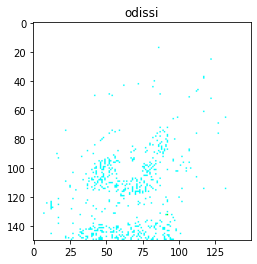

In [0]:
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.imshow(X[2])
plt.title(Y[2])
plt.show()

In [0]:
#def get_max_width(img):
 #   return img.shape[1]

#def get_max_height(img):
 #   return img.shape[0]

In [0]:
#w = max(X, key=get_max_width).shape[1]
#h = max(X, key=get_max_height).shape[0]

In [0]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Y)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
Y = onehot_encoder.fit_transform(integer_encoded)

In [0]:
Y.shape

(364, 8)

In [0]:
X = X/255

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D, Activation, MaxPooling2D, Dense, Flatten, SpatialDropout2D
#import SpatialPyramidPooling

Using TensorFlow backend.


In [0]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(SpatialDropout2D(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
spatial_dropout2d_3 (Spatial (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 1401864   
_________________________________________________________________
activation_6 (Activation)    (None, 8)                

In [0]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
291/291 [==============================] - 4s 12ms/step - loss: 7.4622 - accuracy: 0.1478
Epoch 2/10
291/291 [==============================] - 3s 12ms/step - loss: 2.6559 - accuracy: 0.3162
Epoch 3/10
291/291 [==============================] - 3s 12ms/step - loss: 1.3385 - accuracy: 0.5842
Epoch 4/10
291/291 [==============================] - 3s 12ms/step - loss: 0.7725 - accuracy: 0.8282
Epoch 5/10
291/291 [==============================] - 3s 12ms/step - loss: 0.4068 - accuracy: 0.9553
Epoch 6/10
291/291 [==============================] - 3s 12ms/step - loss: 0.2062 - accuracy: 0.9966
Epoch 7/10
291/291 [==============================] - 3s 12ms/step - loss: 0.1058 - accuracy: 0.9931
Epoch 8/10
291/291 [==============================] - 3s 12ms/step - loss: 0.0610 - accuracy: 0.9966
Epoch 9/10
291/291 [==============================] - 3s 12ms/step - loss: 0.0417 - accuracy: 1.0000
Epoch 10/10
291/291 [==============================] - 3s 12ms/step - loss: 0.0312 - accura

In [0]:
model.evaluate(X_test, y_test)

73/73 [==============================] - 0s 5ms/step


[1.524629040940167, 0.465753436088562]

In [0]:
p = model.predict(X_test)

In [0]:
inarr = np.array([])

In [0]:
for e in p:
  inarr  = np.append(inarr, np.argmax(e))

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(onehot_encoder.inverse_transform(y_test),inarr))

              precision    recall  f1-score   support

           0       0.44      0.40      0.42        10
           1       0.33      0.50      0.40        10
           2       0.67      0.55      0.60        11
           3       0.27      0.43      0.33         7
           4       0.67      0.57      0.62         7
           5       0.50      0.50      0.50         8
           6       1.00      0.27      0.42        15
           7       0.36      0.80      0.50         5

    accuracy                           0.47        73
   macro avg       0.53      0.50      0.47        73
weighted avg       0.58      0.47      0.47        73



In [0]:
df = pd.read_csv('/content/drive/My Drive/Dance/dataset/test.csv')
X = np.zeros((1,150,150,3))
#largest width = 4477, largest height = 3872
for index, row in df.iterrows():
  p = os.path.join('/content/drive/My Drive/Dance/dataset/test', row['Image'])
  image = cv2.imread(p)
  g = cv2.resize(image, (150, 150))
  g = np.reshape(g,(1,150,150,3))
  X = np.append(X,g,axis=0)

X = np.delete(X,0,0)
X = X/255
p = model.predict(X)
inarr = np.array([])
for e in p:
  inarr  = np.append(inarr, np.argmax(e))

In [0]:
out = label_encoder.inverse_transform(inarr.astype(int))

In [0]:
df['target']=out

In [0]:
df.to_csv('submission1.csv',index=False)